# Section 21: Python for Machine Learning: K Means Algorithm 

### K Means Algorithm Theory

In [50]:
### K Means is an unsupervised learning algorithm that will attempt to group similar clusters together in your 
### data. 

### So what does a typical clustering problem looks like? 
### - Cluster similar documents
### - Cluster Customers based on features
### - Market Segmentation 
### - Identify Similar Physical Groups 

### Overall Goal -> Divide Data into distinct groups such that observations within each group are similar. 

### K means algorithm 

### 1 - Choose number of clusters 'K'
### 2 - Randomly assign each point to a cluster 
### 3 - Until clusters Stop changing, repeat the following: 
###     3.a - For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster. 
###     3.b - Assign each data point to a cluster for which the centroid is the closest. 

### Choosing a K value 
###                    -> Elbow method -> Could work -> Compute sum of squared errors for k values... k = 2,3,4,...
###                       You will see that the SSE decreases as k increased -> Choose best k when SSE decreases abruptly
###                    -> Problem dependent -> Experience/ Domain Knowledge required. 


### K Means with Python

In [51]:
### First, lets create an artificial Data Set with Scikit-Learn 

###Imports 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

##Generating the Data 
from sklearn.datasets import make_blobs ##Generates blob-like groups of data that may be modified as desired. 

In [52]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

type(data) ## Our Data is a tuple which contains the feature data in element 0 
           ## and the cluster they belong to in element 1

tuple

In [53]:
data[0] ##Feature data is returned as numpy array

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [54]:
data[0].shape ##200 samples and two features

(200, 2)

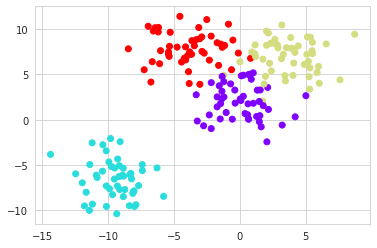

In [55]:
### Let's explote the data further by visualizing it 
sns.set_style('whitegrid')
plt.scatter(data[0][:,0], data[0][:,1], c = data[1], cmap = 'rainbow')

In [56]:
## Importing our model
from sklearn.cluster import KMeans 

In [57]:
## Instantiating the model 
kmeans = KMeans(n_clusters=4) ##Determined beforehand

In [58]:
##Fitting the data
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
## We can now obtain many attributes such as where the cluster centers are located
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [60]:
## More importantly, we can obtain the labels to which each data point is predicted to belong 
kmeans.labels_

array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       2, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3,
       2, 1, 1, 3, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0,
       2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3,
       0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0,
       1, 2], dtype=int32)

In [61]:
### NOTE -> Whenever, we are working with unlabeled data there is nothing left to do at this point. 
### We would not be able to compare anything to the real values. 

### We have the labels in this case: 
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

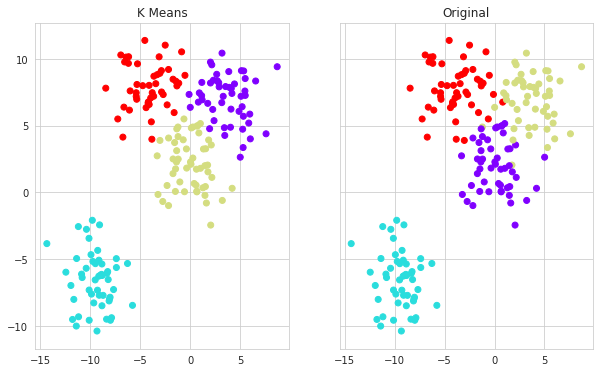

In [62]:
### However, we wouldn't have need the labels since we are trying to find a pattern in our data. Recall that 
### KMeans is an unsupervised learning algorithm. -> We are trying to find the labels 

### Lets visualize the results of our fit 

fig, (ax1,ax2) = plt.subplots(1,2, sharey = True, figsize = (10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c = kmeans.labels_, cmap = 'rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c = data[1], cmap = 'rainbow')

In [63]:
### Keep in mind that with KMeans, it is not expected to know the labels of our data. 